# Week 4: Naive bayes classifier


# Naive Bayes Classifier in Python
In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. In this kernel, I implement Naive Bayes Classification algorithm with Python and Scikit-Learn. I build a Naive Bayes Classifier to predict types of flower.

So, let's get started.

In [64]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import data
data = pd.read_csv('IRIS.csv')

In [39]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
import warnings

warnings.filterwarnings('ignore')

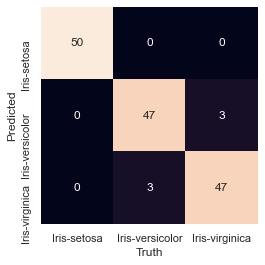

In [42]:
# Create the X, Y, Training and Test
xdata = data.drop('species', axis=1)
ydata = data.loc[:, 'species']



# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(xdata, ydata)

# Predict Output # Plot Confusion Matrix
mat = confusion_matrix(pred, ydata)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
pred = model.predict(xdata)



In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
  
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_data, y_data)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.95


# Classification Report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



# Calculate class probabilities

In [20]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.00000000e+000, 4.85960219e-016, 2.24347925e-028],
       [4.81032927e-029, 9.99999988e-001, 1.16657116e-008],
       [8.55082235e-094, 9.69653014e-001, 3.03469859e-002],
       [1.00000000e+000, 1.43672766e-014, 4.85229968e-027],
       [1.81141042e-252, 4.01430066e-008, 9.99999960e-001],
       [1.81704672e-113, 3.73062892e-001, 6.26937108e-001],
       [3.00349394e-179, 6.53670270e-007, 9.99999346e-001],
       [1.00000000e+000, 4.26226391e-011, 9.54068350e-022],
       [1.00000000e+000, 4.42208196e-015, 7.70527673e-027],
       [4.98375044e-215, 2.81534320e-008, 9.99999972e-001]])

In [55]:
# store the probabilities
y_pred1 = gnb.predict_proba(X_test)[:, 1]

#print the first 10 predicted probabilities
gnb.predict_proba(X_test)[0:10, 1]

array([4.85960219e-16, 9.99999988e-01, 9.69653014e-01, 1.43672766e-14,
       4.01430066e-08, 3.73062892e-01, 6.53670270e-07, 4.26226391e-11,
       4.42208196e-15, 2.81534320e-08])

# k-Fold Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_data,y_data, cv = 10, scoring='accuracy')

print('Cross-validation scores:{''}'.format(scores))

Cross-validation scores:[1.         1.         0.88888889 1.         0.88888889 0.88888889
 1.         0.88888889 0.88888889 1.        ]


In [63]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9444


# Results and conclusion

1-In this project, I build a Gaussian Naïve Bayes Classifier model to predict types of flower based on measurements. The model yields a very good performance as indicated by the model accuracy which was found to be 0.95.
2-Using the mean cross-validation, we can conclude that we expect the model to be around 0.9444 accurate on average.

So, we can conclude that our classifier does a very good job in predicting types of flower based on measurements 